# Homework 6 mnist digits classification using TensorFlow and Neural Network

## Daniel Sierra Botero C.C. 1152216176

* classify mnist_test.csv dataset
* what is the highest validation set accuracy you get (95%...?)
    * consider normalizing the data
    * changing optimizer (sgd,rmsprop,adam)...
    * number of epochs
    * structure of the Neural Network (number of neurons)
    * you can convert the labels to one-hot
* remember to fix the randomizer (maybe with the same number as I have here for comparison)

In [1]:
#Load python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

In [2]:
#reading the data
images_df = pd.read_csv('mnist_test.csv')

images_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#separate the data into X_data (images) and y_data (label), transform them into numpy arrays
X_data = images_df.drop('label',axis=1).to_numpy()
y_data = images_df['label'].to_numpy()

In [4]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=1046)

In [5]:
#as we are going to compare performance we set the seed fixed
tf.random.set_seed(1046)

In [6]:
#we build the function to generate the model, as later we will change the structure of the NN the number
#of neurons is added as a parameter of the function

def get_model(input_shape, units):
    model=Sequential([InputLayer(input_shape=input_shape),
                      Dense(units=units,activation='relu',name='layer_1'),
                      Dense(units=10,activation='softmax',name='output_layer')
                     ])
    return model

In [7]:
#we build the function to compile the model, as later we will change the optimizer it's added as a parameter of the function

def compile_model(model, optimizer):
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [8]:
# first model 1 layer, 50 neurons, epochs 30

first_model = get_model(X_train[0].shape, 50)
compile_model(first_model, 'adam')
first_history = first_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 13.6994 - accuracy: 0.6848 - val_loss: 4.6891 - val_accuracy: 0.7880
Epoch 2/30
188/188 - 0s - loss: 2.6246 - accuracy: 0.8223 - val_loss: 2.8514 - val_accuracy: 0.8007
Epoch 3/30
188/188 - 0s - loss: 1.2537 - accuracy: 0.8532 - val_loss: 1.7519 - val_accuracy: 0.7780
Epoch 4/30
188/188 - 0s - loss: 0.7162 - accuracy: 0.8695 - val_loss: 1.8651 - val_accuracy: 0.8133
Epoch 5/30
188/188 - 0s - loss: 0.5320 - accuracy: 0.8875 - val_loss: 1.5323 - val_accuracy: 0.8060
Epoch 6/30
188/188 - 0s - loss: 0.4295 - accuracy: 0.9010 - val_loss: 1.4694 - val_accuracy: 0.8373
Epoch 7/30
188/188 - 0s - loss: 0.3948 - accuracy: 0.9130 - val_loss: 1.4508 - val_accuracy: 0.8440
Epoch 8/30
188/188 - 0s - loss: 0.3155 - accuracy: 0.9263 - val_loss: 1.3950 - val_accuracy: 0.8560
Epoch 9/30
188/188 - 0s - loss: 0.3013 - accuracy: 0.9285 - val_loss: 1.3328 - val_accuracy: 0.8467
Epoch 10/30
188/188 - 0s - loss: 0.3179 - accuracy: 0.9333 - val_loss: 1.4741 - val_accuracy: 0.840

In [9]:
first_loss, first_accuracy = first_model.evaluate(X_test, y_test)
print(first_accuracy)

79/79 [==============================] - 0s 1ms/step - loss: 1.3732 - accuracy: 0.9028
0.9028000235557556


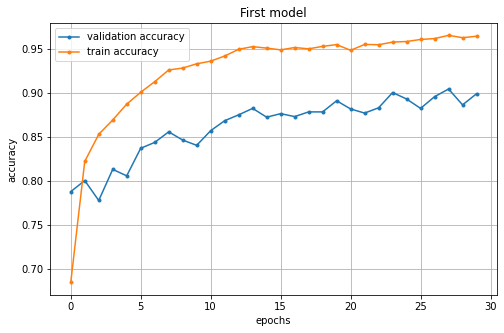

In [10]:
#visualization of the accuracy
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(np.arange(30),first_history.history['val_accuracy'], '.-', label='validation accuracy')
ax.plot(np.arange(30),first_history.history['accuracy'], '.-', label='train accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.set_title('First model')
ax.grid()
ax.legend()

As we can see, the accuracy of the model tends to values ​​close to 0.9 both for the validation data and when comparing it with the test data.

## Normalizing the data

In [11]:
#normalize the data using sklearn StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
Xnorm_data = scaler.transform(X_data)

In [12]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xnorm_data, y_data, random_state=1046)

In [13]:
# normalized model 1 layer, 50 neurons, epochs 30

normalized_model = get_model(X_train[0].shape, 50)
compile_model(normalized_model, 'adam')
normalized_history = normalized_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 0.7039 - accuracy: 0.8000 - val_loss: 0.3500 - val_accuracy: 0.9060
Epoch 2/30
188/188 - 0s - loss: 0.2309 - accuracy: 0.9350 - val_loss: 0.2846 - val_accuracy: 0.9180
Epoch 3/30
188/188 - 0s - loss: 0.1438 - accuracy: 0.9585 - val_loss: 0.2684 - val_accuracy: 0.9160
Epoch 4/30
188/188 - 0s - loss: 0.0977 - accuracy: 0.9750 - val_loss: 0.2529 - val_accuracy: 0.9307
Epoch 5/30
188/188 - 0s - loss: 0.0689 - accuracy: 0.9847 - val_loss: 0.2534 - val_accuracy: 0.9293
Epoch 6/30
188/188 - 0s - loss: 0.0493 - accuracy: 0.9912 - val_loss: 0.2461 - val_accuracy: 0.9293
Epoch 7/30
188/188 - 0s - loss: 0.0362 - accuracy: 0.9943 - val_loss: 0.2462 - val_accuracy: 0.9333
Epoch 8/30
188/188 - 0s - loss: 0.0257 - accuracy: 0.9980 - val_loss: 0.2474 - val_accuracy: 0.9313
Epoch 9/30
188/188 - 0s - loss: 0.0186 - accuracy: 0.9993 - val_loss: 0.2506 - val_accuracy: 0.9360
Epoch 10/30
188/188 - 0s - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.2534 - val_accuracy: 0.9373

In [14]:
normalized_loss, normalized_accuracy = normalized_model.evaluate(X_test, y_test)
print(normalized_accuracy)

79/79 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.9392
0.9391999840736389


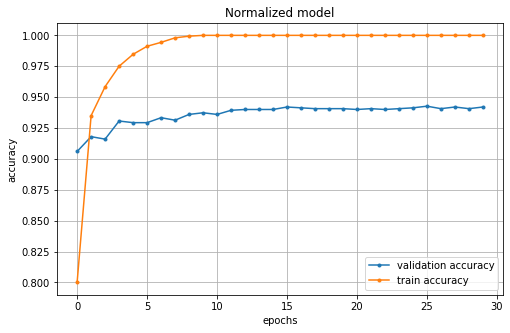

In [15]:
#visualization of the accuracy
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(np.arange(30),normalized_history.history['val_accuracy'], '.-', label='validation accuracy')
ax.plot(np.arange(30),normalized_history.history['accuracy'], '.-', label='train accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.set_title('Normalized model')
ax.grid()
ax.legend()

In this case it can be seen that the accuracy of the model stabilizes more quickly and increases to values close to 0.94 both for the validation data and when comparing it with the test data.

## changing optimizer (using the normalized data)

In [16]:
#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xnorm_data, y_data, random_state=1046)

In [17]:
# sgd model 1 layer, 50 neurons, epochs 30

sgd_model = get_model(X_train[0].shape, 50)
compile_model(sgd_model, 'sgd')
sgd_history = sgd_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 1.1824 - accuracy: 0.6648 - val_loss: 0.6806 - val_accuracy: 0.8327
Epoch 2/30
188/188 - 0s - loss: 0.5033 - accuracy: 0.8712 - val_loss: 0.4993 - val_accuracy: 0.8740
Epoch 3/30
188/188 - 0s - loss: 0.3715 - accuracy: 0.8997 - val_loss: 0.4335 - val_accuracy: 0.8913
Epoch 4/30
188/188 - 0s - loss: 0.3065 - accuracy: 0.9138 - val_loss: 0.3974 - val_accuracy: 0.8933
Epoch 5/30
188/188 - 0s - loss: 0.2650 - accuracy: 0.9260 - val_loss: 0.3741 - val_accuracy: 0.8980
Epoch 6/30
188/188 - 0s - loss: 0.2347 - accuracy: 0.9357 - val_loss: 0.3584 - val_accuracy: 0.9007
Epoch 7/30
188/188 - 0s - loss: 0.2113 - accuracy: 0.9425 - val_loss: 0.3456 - val_accuracy: 0.9060
Epoch 8/30
188/188 - 0s - loss: 0.1924 - accuracy: 0.9460 - val_loss: 0.3364 - val_accuracy: 0.9087
Epoch 9/30
188/188 - 0s - loss: 0.1765 - accuracy: 0.9515 - val_loss: 0.3301 - val_accuracy: 0.9067
Epoch 10/30
188/188 - 0s - loss: 0.1631 - accuracy: 0.9550 - val_loss: 0.3236 - val_accuracy: 0.9060

In [18]:
# rmsprop model 1 layer, 50 neurons, epochs 30

rmsprop_model = get_model(X_train[0].shape, 50)
compile_model(rmsprop_model, 'rmsprop')
rmsprop_history = rmsprop_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 0.6321 - accuracy: 0.8210 - val_loss: 0.3411 - val_accuracy: 0.9007
Epoch 2/30
188/188 - 0s - loss: 0.2256 - accuracy: 0.9352 - val_loss: 0.2829 - val_accuracy: 0.9233
Epoch 3/30
188/188 - 0s - loss: 0.1456 - accuracy: 0.9607 - val_loss: 0.2643 - val_accuracy: 0.9220
Epoch 4/30
188/188 - 0s - loss: 0.0962 - accuracy: 0.9732 - val_loss: 0.2563 - val_accuracy: 0.9273
Epoch 5/30
188/188 - 0s - loss: 0.0706 - accuracy: 0.9830 - val_loss: 0.2665 - val_accuracy: 0.9327
Epoch 6/30
188/188 - 0s - loss: 0.0459 - accuracy: 0.9893 - val_loss: 0.2705 - val_accuracy: 0.9273
Epoch 7/30
188/188 - 0s - loss: 0.0340 - accuracy: 0.9915 - val_loss: 0.2784 - val_accuracy: 0.9313
Epoch 8/30
188/188 - 0s - loss: 0.0221 - accuracy: 0.9963 - val_loss: 0.2849 - val_accuracy: 0.9393
Epoch 9/30
188/188 - 0s - loss: 0.0150 - accuracy: 0.9970 - val_loss: 0.3075 - val_accuracy: 0.9340
Epoch 10/30
188/188 - 0s - loss: 0.0092 - accuracy: 0.9992 - val_loss: 0.3142 - val_accuracy: 0.9327

In [19]:
# adagrad model 1 layer, 50 neurons, epochs 30

adagrad_model = get_model(X_train[0].shape, 50)
compile_model(adagrad_model, 'adagrad')
adagrad_history = adagrad_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 1.9195 - accuracy: 0.3872 - val_loss: 1.4812 - val_accuracy: 0.5620
Epoch 2/30
188/188 - 0s - loss: 1.2360 - accuracy: 0.6558 - val_loss: 1.1274 - val_accuracy: 0.6793
Epoch 3/30
188/188 - 0s - loss: 0.9706 - accuracy: 0.7465 - val_loss: 0.9521 - val_accuracy: 0.7367
Epoch 4/30
188/188 - 0s - loss: 0.8234 - accuracy: 0.7908 - val_loss: 0.8444 - val_accuracy: 0.7680
Epoch 5/30
188/188 - 0s - loss: 0.7272 - accuracy: 0.8160 - val_loss: 0.7701 - val_accuracy: 0.7913
Epoch 6/30
188/188 - 0s - loss: 0.6592 - accuracy: 0.8313 - val_loss: 0.7157 - val_accuracy: 0.8067
Epoch 7/30
188/188 - 0s - loss: 0.6080 - accuracy: 0.8435 - val_loss: 0.6738 - val_accuracy: 0.8160
Epoch 8/30
188/188 - 0s - loss: 0.5676 - accuracy: 0.8543 - val_loss: 0.6403 - val_accuracy: 0.8227
Epoch 9/30
188/188 - 0s - loss: 0.5349 - accuracy: 0.8617 - val_loss: 0.6128 - val_accuracy: 0.8300
Epoch 10/30
188/188 - 0s - loss: 0.5076 - accuracy: 0.8678 - val_loss: 0.5899 - val_accuracy: 0.8340

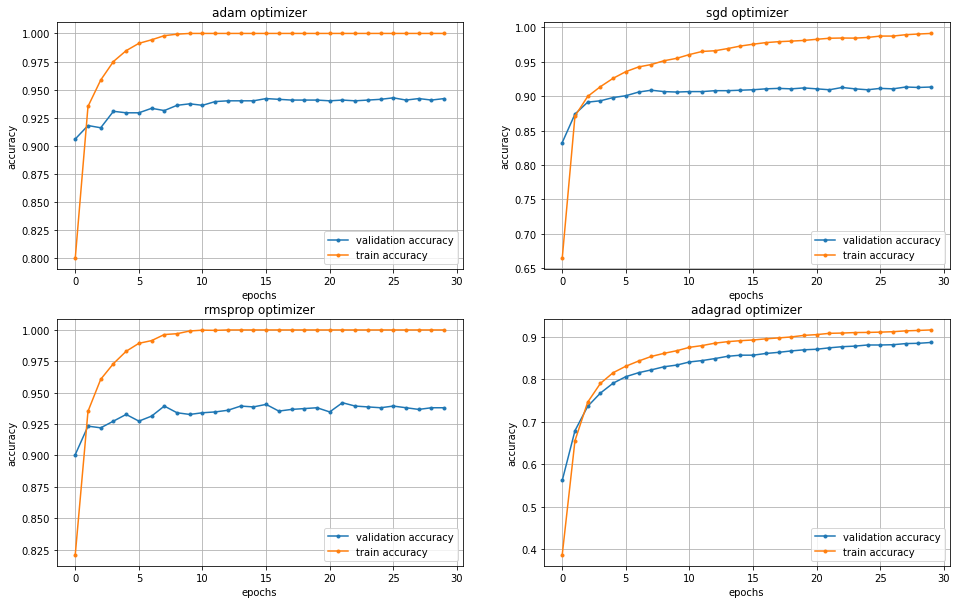

In [20]:
#visualization of the accuracy
fig,ax=plt.subplots(2,2,figsize=(16,10))

ax[0,0].plot(np.arange(30),normalized_history.history['val_accuracy'], '.-', label='validation accuracy')
ax[0,0].plot(np.arange(30),normalized_history.history['accuracy'], '.-', label='train accuracy')
ax[0,0].set_xlabel('epochs')
ax[0,0].set_ylabel('accuracy')
ax[0,0].set_title('adam optimizer')
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].plot(np.arange(30),sgd_history.history['val_accuracy'], '.-', label='validation accuracy')
ax[0,1].plot(np.arange(30),sgd_history.history['accuracy'], '.-', label='train accuracy')
ax[0,1].set_xlabel('epochs')
ax[0,1].set_ylabel('accuracy')
ax[0,1].set_title('sgd optimizer')
ax[0,1].grid()
ax[0,1].legend()

ax[1,0].plot(np.arange(30),rmsprop_history.history['val_accuracy'], '.-', label='validation accuracy')
ax[1,0].plot(np.arange(30),rmsprop_history.history['accuracy'], '.-', label='train accuracy')
ax[1,0].set_xlabel('epochs')
ax[1,0].set_ylabel('accuracy')
ax[1,0].set_title('rmsprop optimizer')
ax[1,0].grid()
ax[1,0].legend()

ax[1,1].plot(np.arange(30),adagrad_history.history['val_accuracy'], '.-', label='validation accuracy')
ax[1,1].plot(np.arange(30),adagrad_history.history['accuracy'], '.-', label='train accuracy')
ax[1,1].set_xlabel('epochs')
ax[1,1].set_ylabel('accuracy')
ax[1,1].set_title('adagrad optimizer')
ax[1,1].grid()
ax[1,1].legend()

You can see that the best validation accuracy is obtained for the optimizers: adam and rmsprop